In [1]:
#Hier wird der Ordner festgelegt

import numpy as np
import matplotlib.pyplot as plt
import os
import tabulate as tabulate
import latex_table as tab
from kafe2 import XYContainer, Fit, Plot, ContoursProfiler
from math import log10 , floor
import math
import pandas as pd
#from varname import nameof #pip install -U varname    in die konsole eingeben


#Directory an dem die Daten sind
directory = "/home/jovyan/Praktikum_P2/238_Transformator" #Directory

#Directory Festlegen und anzeigen
os.chdir(directory) #geht ins gewünschte Directory
directory_path = os.getcwd() #Derzeitiges Directory
print("My current directory is : " + directory_path)
folder_name = os.path.basename(directory_path) #Derzeitiger Ordner
print("My directory name is : " + folder_name)

My current directory is : /home/jovyan/Praktikum_P2/238_Transformator
My directory name is : 238_Transformator


In [2]:
"""
# varname-Ansatz funktioniert nich in einer Funcktion, weil nur der Wert und nicht die Variable übertragen wird

#################### Werte Drucken ####################
Drucken_Wert = True

def printwert(Variable, Einheit):
    if Drucken_Wert == True:
        print(b,"in",Einheit+":", Variable)
        
a = 1.234
b = nameof(a)
printwert(a, "m")
"""

'\n# varname-Ansatz funktioniert nich in einer Funcktion, weil nur der Wert und nicht die Variable übertragen wird\n\n#################### Werte Drucken ####################\nDrucken_Wert = True\n\ndef printwert(Variable, Einheit):\n    if Drucken_Wert == True:\n        print(b,"in",Einheit+":", Variable)\n        \na = 1.234\nb = nameof(a)\nprintwert(a, "m")\n'

In [3]:
######################################## Funktionen definieren ########################################

#################### Werte Drucken ####################
Drucken_Wert = True
def printwert(Variable, Einheit, Wert):
    if Drucken_Wert == True:
        print(Variable,"in",Einheit+":", Wert)
#a = 1.234
#printwert("a", "m", a)

#################### Fehler Drucken ####################
Drucken_Fehler = True
def printfehler(Variable, Einheit, Fehlerwert):
    if Drucken_Fehler == True:
        print("Fehler auf",Variable,"in",Einheit+":", Fehlerwert)
#a_err = 0.5678
#printfehler("a", "m", a_err)

#################### item zwischen Elemente in Liste einfügen ####################
def intersperse(lst, item):
    result = [item] * (len(lst) * 2 - 1)
    result[0::2] = lst
    return result

#################### Werte auf 3 signifikante Stellen runden ####################
def round_it(x, sig):
    if x == 0: # da die Runden-Funktion nicht bei 0 Funktioniert
        return 0
    elif x > 0:
        return round(x, sig-int(floor(log10(abs(x))))-1)
    elif x < 0:
        return round(x, sig-int(floor(log10(abs(x))))-1)
    elif math.isnan(x):
        return x
    else:
        return "error"

#a = 1.234
#print(round_it(a, 3))
#a2 = -1.234
#print(round_it(a2, 3))
#a3 = 0.0000
#print(round_it(a3, 3))

#################### Elemente in Liste auf 3 signifikante Stellen runden ####################
def round_list(list,k):
    list_rounded = []
    for element in list:
        if type(element) == float or np.float64:
            a = round_it(element,k)
            list_rounded.append(a)
        else:
            #print("Error in round_list: element is", type(element))
            list_rounded.append(element)
    return list_rounded

#a1 = [1.234, 5.678]
#print(round_list(a1, 3))

# 238.a

In [4]:
#238_a
print(f'{"238_a)":#^50}')

Messdaten = "238a.txt" #Dateiname

#Daten Laden und ausgeben
data = np.loadtxt(Messdaten)
#print(data) 

#Spalten der Datei auslesen
columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte
columb4 = data[:,3] #4.Spalte
columb5 = data[:,4] #5.Spalte
columb6 = data[:,5] #6.Spalte
columb7 = data[:,6] #7.Spalte
columb8 = data[:,7] #8.Spalte
columb9 = data[:,8] #9.Spalte
columb10 = data[:,9] #10.Spalte

N=len(columb1)
print("N:", N)

"""
print(type(data[:,6][1]))
print(data[:,6][1])

print("\n")

print(type(data[:,5][1]))
print(data[:,5][1])

print("\n")

test = "nan"
print(test)
print(type(test))
"""

######################238_a)######################
N: 13


'\nprint(type(data[:,6][1]))\nprint(data[:,6][1])\n\nprint("\n")\n\nprint(type(data[:,5][1]))\nprint(data[:,5][1])\n\nprint("\n")\n\ntest = "nan"\nprint(test)\nprint(type(test))\n'

In [5]:
#################### LaTex-Tabelle erstellen ####################

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 3
columb1_rounded = round_list(columb1, k)
columb2_rounded = round_list(columb2, k)
columb3_rounded = round_list(columb3, k)
columb4_rounded = round_list(columb4, k)
columb5_rounded = round_list(columb5, k)
columb6_rounded = round_list(columb6, k)
columb7_rounded = round_list(columb7, k)
columb8_rounded = round_list(columb8, k)
columb9_rounded = round_list(columb9, k)
columb10_rounded = round_list(columb10, k)


table1 = tab.LatexTable([columb1_rounded, columb2_rounded, columb3_rounded, columb4_rounded, columb5_rounded, columb6_rounded, columb7_rounded, columb8_rounded, columb9_rounded, columb10_rounded])
print(table1)

print("\n")

print("$t$", "&", "$I_1 [A]$", "&", "$U_B [V]$", "&", "$LF1$", "&", "$I_2 [A]$", "&", "$U_R [V]$","&", "$LF2$", "&", "$P_{ein} [W]$","&", "$P_{aus} [W]$", "&", "$f$", "\\\ ")
#		\captionof{table}{Messwerte $238.a$}

print("\n")

#################### Testtabelle, um zu verstehen, wie der Header funktioniert ####################
table2 = tab.LatexTable([columb1_rounded, columb2_rounded],header=["Spalte1", "Spalte2"])
print(table2)


\begin{tabular}{cccccccccc}
\hline
0 & 0.996 & 47.3 & 0.0554 & -0.0561 & 0.843 & nan & 2.61 & nan & nan \\ 
0 & 0.976 & 47.3 & 0.118 & -0.0561 & 3.88 & nan & 5.44 & nan & nan \\ 
0 & 0.962 & 47.3 & 0.187 & -0.0561 & 7.17 & nan & 8.51 & nan & nan \\ 
0 & 0.948 & 47.2 & 0.244 & -0.0561 & 9.87 & nan & 10.9 & nan & nan \\ 
0 & 0.928 & 47.2 & 0.311 & -0.0561 & 13.2 & nan & 13.6 & nan & nan \\ 
0 & 0.909 & 47.2 & 0.362 & -0.0561 & 15.6 & nan & 15.5 & nan & nan \\ 
0 & 0.888 & 47.2 & 0.409 & -0.0561 & 17.9 & nan & 17.1 & nan & nan \\ 
0 & 0.855 & 47.2 & 0.472 & -0.0561 & 20.9 & nan & 19.0 & nan & nan \\ 
0 & 0.832 & 47.1 & 0.51 & -0.0561 & 22.7 & nan & 20.0 & nan & nan \\ 
0 & 0.808 & 47.1 & 0.546 & -0.0561 & 24.5 & nan & 20.8 & nan & nan \\ 
0 & 0.786 & 47.1 & 0.576 & -0.0561 & 26.0 & nan & 21.3 & nan & nan \\ 
0 & 0.747 & 47.1 & 0.623 & -0.0561 & 28.3 & nan & 21.9 & nan & nan \\ 
0 & 0.717 & 47.1 & 0.654 & -0.0561 & 29.8 & nan & 22.1 & nan & nan \\ 
\end{tabular} 



$t$ & $I_1 [A]$ & $U_B 

<table><tr>
<td> <img src="figs/238_Schaltung_1.jpg" style="width: 50%;" /> </td>
<td> <img src="figs/Abb_238_6.jpg" style="width: 60%;" /> </td>
</tr></table>

# 238.b

In [6]:
#################### gemessene Werte ####################
print(f'{"Gemessene Werte":#^50}')

t = columb1 #Zeit in s #0

I_1 = columb2 #Stromstärke I_1 in A
print("Stromstärke I_1 in A:", I_1)
U_1 = columb3 #Spannung U_1 in V
U_B = U_1 #in den Gleichungen in der Anleitung auch oft U z.B. in der 238b
print("Stromstärke U_B in V:", U_B)

LF1 = columb4 #Leitstungsfaktor LF1 cos&j_1

I_2 = columb5 #Stromstärke I_2 in A #Falsche Werte: wurden nicht gemessen
#print("Stromstärke I_2 in A:", I_2)
U_2 = columb6 #Spannung U_2 in V
U_R = U_2
print("Stromstärke U_R in V:", U_R)

LF2 = columb7 #Leitstungsfaktor LF2 cos&j_2 #NAN

P_ein = columb8 #Leitstung P_1 in W
P_W = P_ein
print("Wirkleistung P_W in W:", P_W)

P_aus = columb9 #Leistung P_2 in W #NAN
f = columb10 #Frequenz f in Hz #NAN

U_eff = 47 #in V aus der 238a) Aufgabenstellung
print("U_eff in V:", U_eff)
f = 50 #in Hz
print("f in Hz:", f)
C = 80/1000/1000 #Umrechnung von µF in F
print("C in F:", C)

#################### gemessene Fehler ####################
print(f'{"gemessene Fehler":#^50}')

U_B_err = U_B*0.01 #in V 2% Fehler
print("Fehler auf U_B in V:", U_B_err)
I_1_err = I_1*0.02 #in A 1% Fehler
print("Fehler auf I_1 in V:", I_1_err)
U_R_err = U_R*0.01 #in V 2% Fehler
print("Fehler auf U_R in V:", U_R_err)
I_2_err = I_2*0.02 #in A 1% Fehler
print("Fehler auf I_2 in V:", I_2_err)

P_ein_err = P_ein*0.01 #in W 1% Fehler
P_W_err = P_ein_err
print("Fehler auf P_W in W:", P_W_err)

U_eff_err = 1 #in V
print("Fehler auf U_eff in V:", U_eff_err)
f_err = 1 #in Hz
print("Fehler auf f in Hz:", f_err)
C_err = 1*10**(-6) #Umrechnung von µF in F
print("Fehler auf C in F:", C_err)

#################### Werte berechnen ####################
print(f'{"Werte berechnen":#^50}')

R = U_R/I_1 #in Aufgbenstellung 238.b
print("Widerstand R in Ohm", R)

P_S = U_B*I_1 #in Aufgbenstellung 238.b
print("Scheinleistung P_S in W:", P_S)

cosphi = U_R/U_B #in Aufgbenstellung 238.b
print("cosphi in rad:", cosphi)

w = 2*np.pi*f
print("w in 1/s:", w)

P_W_max = (1/2)*w*C*U_eff**2 #Gl. 238.8
print("P_W_max in W:", P_W_max)

R_max = 1/(w*C) #Gl. 238.9
print("R_max in Ohm:", R_max)

#################### Fehler berechnen ####################
print(f'{"Fehler berechnen":#^50}')

s1 = (1/I_1)*U_R_err
s2 = (-U_R/I_1**2)*I_1_err
R_err = (s1**2+s2**2)**(1/2)
print("Fehler auf R in Ohm:",R_err)

s1 = (I_1)*U_B_err
s2 = (U_B)*I_1_err
P_S_err = (s1**2+s2**2)**(1/2)
print("Fehler auf P_S in W:", P_S_err)

s1 = (1/U_B)*U_R_err
s2 = (-U_R/U_B**2)*U_B_err
cosphi_err = (s1**2+s2**2)**(1/2)
print("Fehler auf cosphi in rad:", cosphi_err)

w_err = ((2*np.pi*f_err)**2)**(1/2)
print("Fehler auf w in 1/s:", w_err)

s1 = ((1/2)*C*U_eff)*w_err
s2 = ((1/2)*w*U_eff)*C_err
s3 = ((1/2)*w*C)*U_eff_err
P_W_max_err = (s1**2+s2**2+s3**2)**(1/2)
print("Fehler auf P_W_max in W:", P_W_max_err)

s1 = (-1/(w**2*C))*w_err
s2 = (-1/(w*C**2))*C_err
R_max_err = (s1**2+s2**2)**(1/2)
print("Fehler auf R_max in Ohm:", R_max_err)

#################Gemessene Werte##################
Stromstärke I_1 in A: [0.99631274 0.97635895 0.96184315 0.94792334 0.9279119  0.90915289
 0.88761419 0.85533448 0.83203527 0.80775997 0.78606161 0.74661067
 0.71743804]
Stromstärke U_B in V: [47.3155215  47.30723778 47.2909827  47.20063371 47.1953448  47.17132569
 47.15497089 47.15941742 47.09569686 47.08376949 47.11609892 47.07889165
 47.13373826]
Stromstärke U_R in V: [ 0.84307267  3.87770673  7.16945507  9.87388585 13.18919128 15.59326072
 17.85413242 20.89092094 22.74967495 24.48819809 26.02143373 28.29617142
 29.84099272]
Wirkleistung P_W in W: [ 2.60997281  5.44086555  8.50878622 10.89689496 13.60521696 15.52312622
 17.13705027 19.0345649  19.98275215 20.75898273 21.33766747 21.88757479
 22.10999722]
U_eff in V: 47
f in Hz: 50
C in F: 8e-05
#################gemessene Fehler#################
Fehler auf U_B in V: [0.47315522 0.47307238 0.47290983 0.47200634 0.47195345 0.47171326
 0.47154971 0.47159417 0.47095697 0.47083769 0.471160

In [7]:
#################### LaTex-Tabelle erstellen für die berechneten Werte in 238.a und 238.b ####################

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 3
columb1_rounded = round_list(R, k)
columb2_rounded = round_list(R_err, k)
columb3_rounded = round_list(cosphi, k)
columb4_rounded = round_list(cosphi_err, k)
columb5_rounded = round_list(P_S, k)
columb6_rounded = round_list(P_S_err, k)
columb7_rounded = round_list(P_W, k)
columb8_rounded = round_list(P_W_err, k)

table1 = tab.LatexTable([columb1_rounded, columb2_rounded, columb3_rounded, columb4_rounded, columb5_rounded, columb6_rounded, columb7_rounded, columb8_rounded])
print(table1)

print("\n")

print("$R [\Omega]$", "&", "$\Delta R [\Omega]$", "&", "$\cos(\phi) [^{\circ}]$", "&", "$\Delta \cos(\phi) [^{\circ}]$", "&", "$P_S [W]$","&", "$\Delta P_S [W]$", "&", "$P_W [W]$","&", "$\Delta P_W [W]$", "\\\ ")
#		\captionof{table}{Berechnete Werte $238.b$}

\begin{tabular}{cccccccc}
\hline
0.846 & 0.0189 & 0.0178 & 0.000252 & 47.1 & 1.05 & 2.61 & 0.0261 \\ 
3.97 & 0.0888 & 0.082 & 0.00116 & 46.2 & 1.03 & 5.44 & 0.0544 \\ 
7.45 & 0.167 & 0.152 & 0.00214 & 45.5 & 1.02 & 8.51 & 0.0851 \\ 
10.4 & 0.233 & 0.209 & 0.00296 & 44.7 & 1.0 & 10.9 & 0.109 \\ 
14.2 & 0.318 & 0.279 & 0.00395 & 43.8 & 0.979 & 13.6 & 0.136 \\ 
17.2 & 0.384 & 0.331 & 0.00467 & 42.9 & 0.959 & 15.5 & 0.155 \\ 
20.1 & 0.45 & 0.379 & 0.00535 & 41.9 & 0.936 & 17.1 & 0.171 \\ 
24.4 & 0.546 & 0.443 & 0.00626 & 40.3 & 0.902 & 19.0 & 0.19 \\ 
27.3 & 0.611 & 0.483 & 0.00683 & 39.2 & 0.876 & 20.0 & 0.2 \\ 
30.3 & 0.678 & 0.52 & 0.00736 & 38.0 & 0.85 & 20.8 & 0.208 \\ 
33.1 & 0.74 & 0.552 & 0.00781 & 37.0 & 0.828 & 21.3 & 0.213 \\ 
37.9 & 0.847 & 0.601 & 0.0085 & 35.1 & 0.786 & 21.9 & 0.219 \\ 
41.6 & 0.93 & 0.633 & 0.00895 & 33.8 & 0.756 & 22.1 & 0.221 \\ 
\end{tabular} 



$R [\Omega]$ & $\Delta R [\Omega]$ & $\cos(\phi) [^{\circ}]$ & $\Delta \cos(\phi) [^{\circ}]$ & $P_S [W]$ & $\

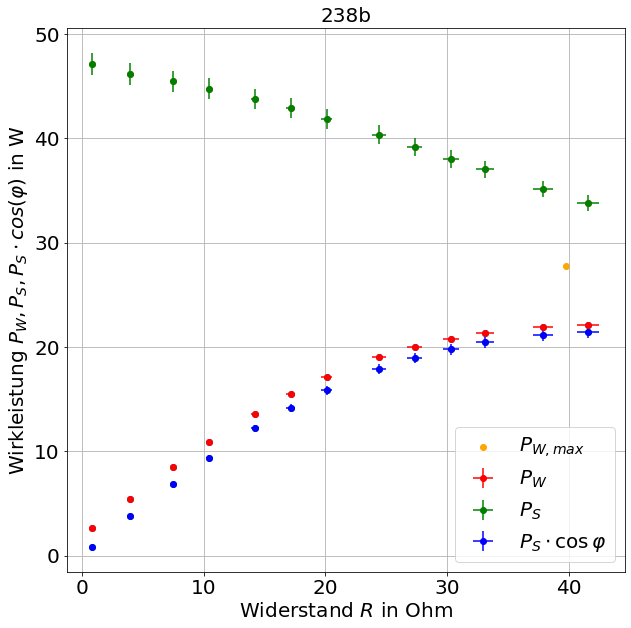

In [8]:
#Hier wird der Plot erstellt

name = "238b"

#Werte festlegen

#Rot
x_1 = R
y_1 = P_W
x_1_err = R_err
y_1_err = P_W_err

#Grün
x_2 = R
y_2 = P_S
x_2_err = R_err
y_2_err = P_S_err

#Blau
x_3 = R
y_3 = P_S*cosphi
x_3_err = R_err
y_3_err = ((cosphi*P_S_err)**2+(P_S*cosphi_err)**2)**(1/2)

xlabel = r'Widerstand $R$ in Ohm'
ylabel = r'Wirkleistung $P_W, P_S, P_S \cdot cos(\varphi)$ in W'

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (10,10)) #Größe des Bildes
plt.scatter(x_1,y_1) #eigentlicher Plot
plt.scatter(x_2,y_2) #eigentlicher Plot
plt.scatter(x_3,y_3) #eigentlicher Plot
plt.scatter(R_max,P_W_max, color = "orange",label=r'$P_{W,max}$') #eigentlicher Plot
plt.xlabel(xlabel) #Achsenbeschriftung x-Achse
plt.ylabel(ylabel) #Achsenbeschriftung y-Achse
plt.title(name) #Titel des Plots
plt.errorbar(x_1, y_1, xerr = x_1_err, yerr = y_1_err, fmt = "o", color = "r", label=r'$P_W$') #Fehlerbalken, color r = Rot     #es geht auch marker="." statt fmt = "o"
plt.errorbar(x_2, y_2, xerr = x_2_err, yerr = y_2_err, fmt = "o", color = "g", label=r'$P_S$') #Fehlerbalken, color g = Grün
plt.errorbar(x_3, y_3, xerr = x_3_err, yerr = y_3_err, fmt = "o", color = "b", label=r'$P_S \cdot \cos \varphi$') #Fehlerbalken, color b = Blau
plt.grid() #Gitter
plt.legend() #Legende erstellen
#plt.tick_params(axis = "x", labelrotation = 30) #Rotiert die Achsenticks um 30°
plt.show #Plot anzeigen
plt.savefig(f'{name+".jpg"}', dpi = 300) #Plot als jpg-Datei abspeichern

# 238.c

In [9]:
#238_c
print(f'{"238_c)":#^50}')

Messdaten = "238c.txt" #Dateiname

#Daten Laden und ausgeben
data = np.loadtxt(Messdaten)
#print(data) 

#Spalten der Datei auslesen
columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte
columb4 = data[:,3] #4.Spalte
columb5 = data[:,4] #5.Spalte
columb6 = data[:,5] #6.Spalte
columb7 = data[:,6] #7.Spalte
columb8 = data[:,7] #8.Spalte
columb9 = data[:,8] #9.Spalte
columb10 = data[:,9] #10.Spalte

N=len(columb1)
print("N:", N)

print(np.matrix(data))

######################238_c)######################
N: 31
[[ 0.00000000e+00  1.33783966e-01  4.73154687e+01  4.17033371e-01
  -4.16333657e-03  4.60410557e+01 -1.00000000e+00  2.63984253e+00
   1.91684411e-01             nan]
 [ 0.00000000e+00  1.93007006e-01  4.71303486e+01  6.12306626e-01
   1.04031313e-01  4.57210462e+01 -1.00000000e+00  5.56983956e+00
  -4.75642047e+00             nan]
 [ 0.00000000e+00  2.64466191e-01  4.71091579e+01  7.19288430e-01
   2.01944897e-01  4.55428838e+01 -1.00000000e+00  8.96145599e+00
  -9.19715299e+00             nan]
 [ 0.00000000e+00  3.42209368e-01  4.71027458e+01  7.83200827e-01
   2.98205493e-01  4.53531267e+01 -1.00000000e+00  1.26244148e+01
  -1.35245515e+01             nan]
 [ 0.00000000e+00  4.29588075e-01  4.70908733e+01  8.24236396e-01
   3.96865205e-01  4.51470956e+01 -9.99964994e-01  1.66740366e+01
  -1.79166841e+01             nan]
 [ 0.00000000e+00  5.25308471e-01  4.70685511e+01  8.51211362e-01
   5.00696475e-01  4.48790390e+01 -9.99690

In [10]:
#################### LaTex-Tabelle erstellen ####################

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 3
columb1_rounded = round_list(columb1, k)
columb2_rounded = round_list(columb2, k)
columb3_rounded = round_list(columb3, k)
columb4_rounded = round_list(columb4, k)
columb5_rounded = round_list(columb5, k)
columb6_rounded = round_list(columb6, k)
columb7_rounded = round_list(columb7, k)
columb8_rounded = round_list(columb8, k)
columb9_rounded = round_list([abs(ele) for ele in columb9], k) #Umrechnung von negativen Werten in positive Werte
columb10_rounded = round_list(columb10, k)


table1 = tab.LatexTable([columb1_rounded, columb2_rounded, columb3_rounded, columb4_rounded, columb5_rounded, columb6_rounded, columb7_rounded, columb8_rounded, columb9_rounded, columb10_rounded])
print(table1)

print("\n")

print("$t$", "&", "$I_1 [A]$", "&", "$U_B [V]$", "&", "$LF1$", "&", "$I_2 [A]$", "&", "$U_R [V]$","&", "$LF2$", "&", "$P_{ein}/P_{W,1} [W]$","&", "$P_{aus}/P_{W,2} [W]$", "&", "$f$", "\\\ ")
#		\captionof{table}{Messwerte $238.c$}

\begin{tabular}{cccccccccc}
\hline
0 & 0.134 & 47.3 & 0.417 & -0.00416 & 46.0 & -1.0 & 2.64 & 0.192 & nan \\ 
0 & 0.193 & 47.1 & 0.612 & 0.104 & 45.7 & -1.0 & 5.57 & 4.76 & nan \\ 
0 & 0.264 & 47.1 & 0.719 & 0.202 & 45.5 & -1.0 & 8.96 & 9.2 & nan \\ 
0 & 0.342 & 47.1 & 0.783 & 0.298 & 45.4 & -1.0 & 12.6 & 13.5 & nan \\ 
0 & 0.43 & 47.1 & 0.824 & 0.397 & 45.1 & -1.0 & 16.7 & 17.9 & nan \\ 
0 & 0.525 & 47.1 & 0.851 & 0.501 & 44.9 & -1.0 & 21.0 & 22.5 & nan \\ 
0 & 0.717 & 47.1 & 0.877 & 0.702 & 44.4 & -1.0 & 29.6 & 31.2 & nan \\ 
0 & 0.911 & 47.1 & 0.881 & 0.9 & 43.6 & -0.999 & 37.8 & 39.2 & nan \\ 
0 & 1.11 & 47.1 & 0.882 & 1.1 & 42.8 & -0.999 & 46.1 & 47.1 & nan \\ 
0 & 1.31 & 47.0 & 0.875 & 1.3 & 41.9 & -0.999 & 54.0 & 54.6 & nan \\ 
0 & 1.51 & 46.8 & 0.865 & 1.5 & 40.8 & -0.999 & 61.2 & 61.3 & nan \\ 
0 & 1.71 & 46.8 & 0.851 & 1.7 & 39.7 & -0.999 & 68.1 & 67.6 & nan \\ 
0 & 1.91 & 46.8 & 0.835 & 1.9 & 38.7 & -0.999 & 74.7 & 73.5 & nan \\ 
0 & 2.11 & 46.7 & 0.815 & 2.1 & 37.3 & -0.999

<table><tr>
<td> <img src="figs/Abb_238_7.jpg" style="width: 50%;" /> </td>
<td> <img src="figs/Abb_238_3.jpg" style="width: 60%;" /> </td>
</tr></table>

In [11]:
"""
list = np.array([1,2,3,4])
a = 2
b = a*list
print(b)
"""

'\nlist = np.array([1,2,3,4])\na = 2\nb = a*list\nprint(b)\n'

# 238.d

In [12]:
#238_d
print(f'{"238_d)":#^50}')

Drucken1 = True

#################### gemessene Werte ####################
if Drucken1 is True: print(f'{"Gemessene Werte":#^50}')

t = columb1 #Zeit in s #0
#if Drucken1 is True: print("Zeimt t in s:", t)
I_1 = columb2 #Stromstärke I_1 in A
if Drucken1 is True: print("Stromstärke I_1 in A:", I_1)
U_1 = columb3 #Spannung U_1 in V
if Drucken1 is True: print("Stromstärke U_1 in A:", U_1)
LF1 = columb4 #Leitstungsfaktor LF1 cos&j_1
if Drucken1 is True: print("Leistungsfaktor LF1 in A:", LF1)
I_2 = columb5 #Stromstärke I_2 in A
if Drucken1 is True: print("Stromstärke I_2 in A:", I_2)
U_2 = columb6 #Spannung U_2 in V
if Drucken1 is True: print("Stromstärke U_2 in A:", U_2)
LF2 = columb7 #Leitstungsfaktor LF2 cos&j_2
if Drucken1 is True: print("Leistungsfaktor LF2 in A:", LF2)
P_ein = columb8 #Leitstung P_1 in W
P_W_1 = P_ein
if Drucken1 is True: print("Leistung P_W_1/P_ein in W:", P_W_1)
P_aus = [abs(ele) for ele in columb9] #Leistung P_2 in W #Umrechnung von negativen Werten in positive Werte
P_W_2 = P_aus
if Drucken1 is True: print("Leistung P_W_2/P_aus in W:", P_W_2)
f = columb10 #Frequenz f in Hz #NAN
if Drucken1 is True: print("Frequenz f in Hz:", f)

#1:1 Trafo

R_L = 0.6 #in Ohm
R_1 = R_L
if Drucken1 is True: print("Widerstand von Spule1 in Ohm:", R_1)
R_2 = R_L
if Drucken1 is True: print("Widerstand von Spule2 in Ohm:", R_2)


#################### gemessene Fehler ####################
if Drucken1 is True: print(f'{"gemessene Fehler":#^50}')

U_1_err = U_1*0.02 #in V 2% Fehler
if Drucken1 is True: print("Fehler auf U_1 in V:", U_1_err)
I_1_err = I_1*0.01 #in A 1% Fehler
if Drucken1 is True: print("Fehler auf I_1 in V:", I_1_err)
U_2_err = U_2*0.02 #in V 2% Fehler
if Drucken1 is True: print("Fehler auf U_2 in V:", U_2_err)
I_2_err = I_2*0.01 #in A 1% Fehler
if Drucken1 is True: print("Fehler auf I_2 in V:", I_2_err)

P_W_err = np.array([0.1]*len(columb1)) # in W
P_W_1_err = P_W_err
if Drucken1 is True: print("Fehler auf P_W_1 in W:", P_W_1_err)
P_W_2_err = P_W_err
if Drucken1 is True: print("Fehler auf P_W_2 in W:", P_W_2_err)

R_L_err = np.array([0.1]*len(columb1)) #in Ohm
R_1_err = R_L_err
if Drucken1 is True: print("Fehler auf R_1 in Ohm:", R_1_err)
R_2_err = R_L_err
if Drucken1 is True: print("Fehler auf R_2 in Ohm:", R_2_err)

#################### Werte berechnen ####################
if Drucken1 is True: print(f'{"Werte berechnen":#^50}')

P_S_1 = U_1*I_1
if Drucken1 is True: print("Leistung in Spule 1 P_S_1 in W:", P_S_1)
P_S_2 = U_2*I_2
if Drucken1 is True: print("Leistung in Spule 2 P_S_2 in W:", P_S_2)

eta = P_W_2/P_W_1
if Drucken1 is True: print("ny (Einheitenlos):", eta)

P_V = P_W_1-P_W_2
if Drucken1 is True: print("Verlustleistung P_V in V", P_V)
P_Cu = R_1*I_1**2+R_2*I_2**2
if Drucken1 is True: print("Kupfer-Leistung P_Cu in W:", P_Cu)
P_Fe = P_V-P_Cu
if Drucken1 is True: print("Eisen-Leistung P_Fe in W:", P_Fe)

#################### Fehler berechnen ####################
if Drucken1 is True: print(f'{"Fehler berechnen":#^50}')

s1 = (I_1)*U_1_err
s2 = (U_1)*I_1_err
P_S_1_err = (s1**2+s2**2)**(1/2)
if Drucken1 is True: print("Ferhler auf P_S_1 in W:", P_S_1_err)
s1 = (I_2)*U_2_err
s2 = (U_2)*I_2_err
P_S_2_err = (s1**2+s2**2)**(1/2)
if Drucken1 is True: print("Fehler auf P_S_2 in W:", P_S_2_err)

s1 = (1/P_W_1)*P_W_2_err
s2 = -(P_W_2/P_W_1**2)*P_W_1_err
eta_err = (s1**2+s2**2)**(1/2)
if Drucken1 is True: print("Fehler auf ny (Einheitenlos):", eta_err)

s1 = (1)*P_W_2_err
s2 = (-1)*P_W_1_err
P_V_err = (s1**2+s2**2)**(1/2)
if Drucken1 is True: print("Fehler auf P_V in V", P_V_err)

s1 = (I_1**2)*R_1_err
s2 = (2*R_1*I_1)*I_1_err
s3 = (I_2**2)*R_2_err
s4 = (2*R_2*I_2)*I_2_err
P_Cu_err = (s1**2+s2**2+s2**3+s4**2)**(1/2)
if Drucken1 is True: print("Fehler auf P_Cu in W:", P_Cu_err)

s1 = (1)*P_V_err
s2 = (-1)*P_Cu_err
P_Fe_err = (s1**2+s2**2)**(1/2)
if Drucken1 is True: print("Fehler auf P_Fe in W:", P_Fe_err)

######################238_d)######################
#################Gemessene Werte##################
Stromstärke I_1 in A: [0.13378397 0.19300701 0.26446619 0.34220937 0.42958808 0.52530847
 0.71670909 0.91136432 1.11124462 1.31207713 1.51222205 1.71142571
 1.91016596 2.11263615 2.31366213 2.51257193 2.71418895 2.91511003
 3.1155967  3.31348812 3.51204179 3.21830338 3.41493262 3.61792667
 3.72061613 3.81392764 3.90927767 4.01047579 4.10674909 4.20076804
 4.30176149]
Stromstärke U_1 in A: [47.31546874 47.13034863 47.10915791 47.10274584 47.09087326 47.06855109
 47.11551613 47.09161539 47.05857958 46.97421466 46.79057398 46.75054518
 46.82923602 46.73954461 46.72410741 46.68102726 46.642082   46.63592697
 46.68273839 46.70866512 46.72955642 46.70743593 46.75823336 46.78731958
 46.80694925 46.85364334 46.78523878 46.83792392 46.83307382 46.88703629
 46.98755108]
Leistungsfaktor LF1 in A: [0.41703337 0.61230663 0.71928843 0.78320083 0.8242364  0.85121136
 0.87708194 0.88125427 0.88150353 

In [13]:
#################### LaTex-Tabelle erstellen ####################

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 3
columb1_rounded = round_list(P_S_1, k)
columb2_rounded = round_list(P_S_1_err, k)
columb3_rounded = round_list(P_S_2, k)
columb4_rounded = round_list(P_S_2_err, k)
columb5_rounded = round_list(eta, k)
columb6_rounded = round_list(eta_err, k) 
columb7_rounded = round_list(P_V, k)
columb8_rounded = round_list(P_V_err, k)
columb9_rounded = round_list(P_Cu, k)
columb10_rounded = round_list(P_Cu_err, k)
columb11_rounded = round_list(P_Fe, k)
columb12_rounded = round_list(P_Fe_err, k)

table1 = tab.LatexTable([columb1_rounded, columb2_rounded, columb3_rounded, columb4_rounded, columb5_rounded, columb6_rounded, columb7_rounded, columb8_rounded, columb9_rounded, columb10_rounded, columb11_rounded, columb12_rounded])
print(table1)

print("\n")

print("$P_{S,1} [W]$", "&", "$\Delta P_{S,1} [W]$", "&", "$P_{S,2} [W]$", "&", "$\Delta P_{S,2} [W]$", "&", "$\eta$", "&", "\Delta \eta$","&", "$P_V [W]$", "&", "$\Delta P_V [W]$","&", "$P_{Cu} [W]$", "&", "$\Delta P_{Cu} [W]$", "&", "$P_{Fe} [W]$", "&", "$\Delta P_{Fe} [W]$", "\\\ ")
#		\captionof{table}{Berechnete Werte $238.d$}

\begin{tabular}{cccccccccccc}
\hline
6.33 & 0.142 & -0.192 & 0.00429 & 0.0726 & 0.038 & 2.45 & 0.141 & 0.0107 & 0.0018 & 2.44 & 0.141 \\ 
9.1 & 0.203 & 4.76 & 0.106 & 0.854 & 0.0236 & 0.813 & 0.141 & 0.0288 & 0.00375 & 0.785 & 0.141 \\ 
12.5 & 0.279 & 9.2 & 0.206 & 1.03 & 0.016 & -0.236 & 0.141 & 0.0664 & 0.00706 & -0.302 & 0.142 \\ 
16.1 & 0.36 & 13.5 & 0.302 & 1.07 & 0.0116 & -0.9 & 0.141 & 0.124 & 0.0118 & -1.02 & 0.142 \\ 
20.2 & 0.452 & 17.9 & 0.401 & 1.07 & 0.0088 & -1.24 & 0.141 & 0.205 & 0.0187 & -1.45 & 0.143 \\ 
24.7 & 0.553 & 22.5 & 0.502 & 1.07 & 0.00695 & -1.42 & 0.141 & 0.316 & 0.028 & -1.73 & 0.144 \\ 
33.8 & 0.755 & 31.2 & 0.697 & 1.05 & 0.0049 & -1.53 & 0.141 & 0.604 & 0.0521 & -2.14 & 0.151 \\ 
42.9 & 0.96 & 39.2 & 0.877 & 1.04 & 0.00381 & -1.38 & 0.141 & 0.984 & 0.0842 & -2.36 & 0.165 \\ 
52.3 & 1.17 & 47.1 & 1.05 & 1.02 & 0.0031 & -0.999 & 0.141 & 1.47 & 0.125 & -2.47 & 0.189 \\ 
61.6 & 1.38 & 54.6 & 1.22 & 1.01 & 0.00264 & -0.629 & 0.141 & 2.05 & 0.175 & -2.68 & 0.

y_1 Rot: [ 2.63984253  5.56983956  8.96145599 12.62441482 16.67403656 21.04663384
 29.6174071  37.82133384 46.09698699 53.95710012 61.2104889  68.11197998
 74.70495048 80.46024715 85.67143084 88.60677503 91.74184422 93.84094158
 94.96680807 94.6102675  92.35159089 93.31381441 91.61026301 87.71213669
 84.83068242 81.5340642  76.41636785 70.70606242 63.11923764 54.65138586
 42.66837412]
y_2 Blau: [0.1916844111, 4.756420469, 9.197152985, 13.52455152, 17.91668413, 22.46382554, 31.15160294, 39.2004285, 47.09571706, 54.58571023, 61.32804274, 67.59104198, 73.50178208, 78.45444555, 82.69065341, 84.42052211, 86.44084166, 87.2844153, 86.95447191, 85.10983654, 81.26568147, 84.28257239, 81.07910455, 75.39699943, 71.51826276, 67.29564161, 61.18715418, 54.34758676, 45.68891082, 35.98777849, 22.62888185]


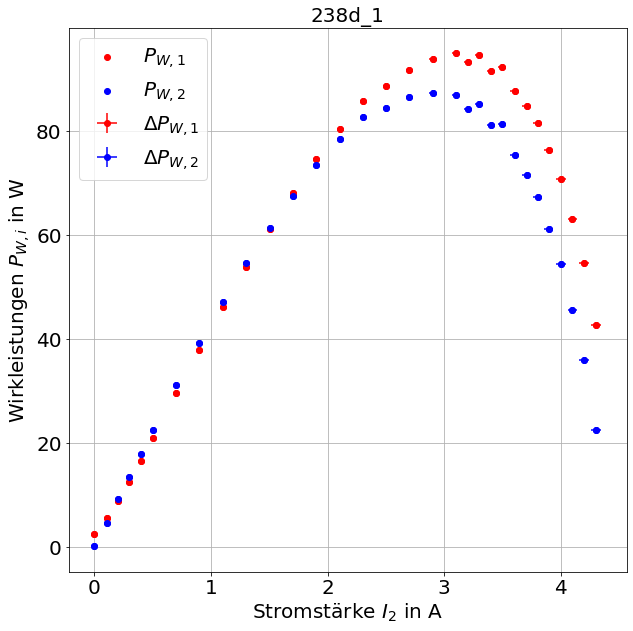

In [14]:
#Hier wird der Plot erstellt

name = "238d_1"

#Werte festlegen

#Rot
x_1 = I_2
y_1 = P_W_1
print("y_1 Rot:", y_1)
x_1_err = I_2_err
y_1_err = P_W_1_err

#Blau
x_2 = I_2
y_2 = P_W_2
print("y_2 Blau:", y_2)
x_2_err = I_2_err
y_2_err = P_W_2_err


xlabel = r'Stromstärke $I_2$ in A'
ylabel = r'Wirkleistungen $P_{W,i}$ in W'

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (10,10)) #Größe des Bildes
plt.scatter(x_1,y_1, color = "r", label="$P_{W,1}$") #eigentlicher Plot
plt.scatter(x_2,y_2, color = "b", label="$P_{W,2}$") #eigentlicher Plot
plt.xlabel(xlabel) #Achsenbeschriftung x-Achse
plt.ylabel(ylabel) #Achsenbeschriftung y-Achse
plt.title(name) #Titel des Plots
plt.errorbar(x_1, y_1, xerr = x_1_err, yerr = y_1_err, fmt = "o", color = "r", label="$\Delta P_{W,1}$") #Fehlerbalken, color r = Rot     #es geht auch marker="." statt fmt = "o"
plt.errorbar(x_2, y_2, xerr = x_2_err, yerr = y_2_err, fmt = "o", color = "b", label="$\Delta P_{W,2}$") #Fehlerbalken, color r = Rot     #es geht auch marker="." statt fmt = "o"
plt.grid() #Gitter
plt.legend() #Legende erstellen
#plt.tick_params(axis = "x", labelrotation = 30) #Rotiert die Achsenticks um 30°
plt.show #Plot anzeigen
plt.savefig(f'{name+".jpg"}', dpi = 300) #Plot als jpg-Datei abspeichern

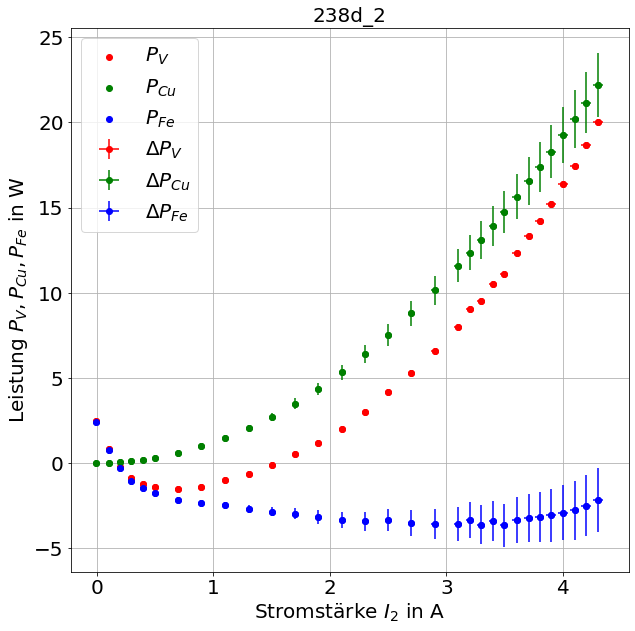

In [15]:
#Hier wird der Plot erstellt

name = "238d_2"

#Werte festlegen

#Rot
x_1 = I_2
y_1 = P_V
x_1_err = I_2_err
y_1_err = P_V_err


#Grün
x_2 = I_2
y_2 = P_Cu
x_2_err = I_2_err
y_2_err = P_Cu_err

#Blau
x_3 = I_2
y_3 = P_Fe
x_3_err = I_2_err
y_3_err = P_Fe_err

xlabel = r'Stromstärke $I_2$ in A'
ylabel = r'Leistung $P_V, P_{Cu}, P_{Fe}$ in W'

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (10,10)) #Größe des Bildes
plt.scatter(x_1,y_1, color = "r", label="$P_V$") #eigentlicher Plot
plt.scatter(x_2,y_2, color = "g", label="$P_{Cu}$") #eigentlicher Plot
plt.scatter(x_3,y_3, color = "b", label="$P_{Fe}$") #eigentlicher Plot
plt.xlabel(xlabel) #Achsenbeschriftung x-Achse
plt.ylabel(ylabel) #Achsenbeschriftung y-Achse
plt.title(name) #Titel des Plots
plt.errorbar(x_1, y_1, xerr = x_1_err, yerr = y_1_err, fmt = "o", color = "r", label="$\Delta P_V$") #Fehlerbalken, color r = Rot     #es geht auch marker="." statt fmt = "o"
plt.errorbar(x_2, y_2, xerr = x_2_err, yerr = y_2_err, fmt = "o", color = "g", label="$\Delta P_{Cu}$") #Fehlerbalken, color g = Grün
plt.errorbar(x_3, y_3, xerr = x_3_err, yerr = y_3_err, fmt = "o", color = "b", label="$\Delta P_{Fe}$") #Fehlerbalken, color b = Blau

plt.grid() #Gitter
plt.legend() #Legende erstellen
#plt.tick_params(axis = "x", labelrotation = 30) #Rotiert die Achsenticks um 30°
plt.show #Plot anzeigen
plt.savefig(f'{name+".jpg"}', dpi = 300) #Plot als jpg-Datei abspeichern

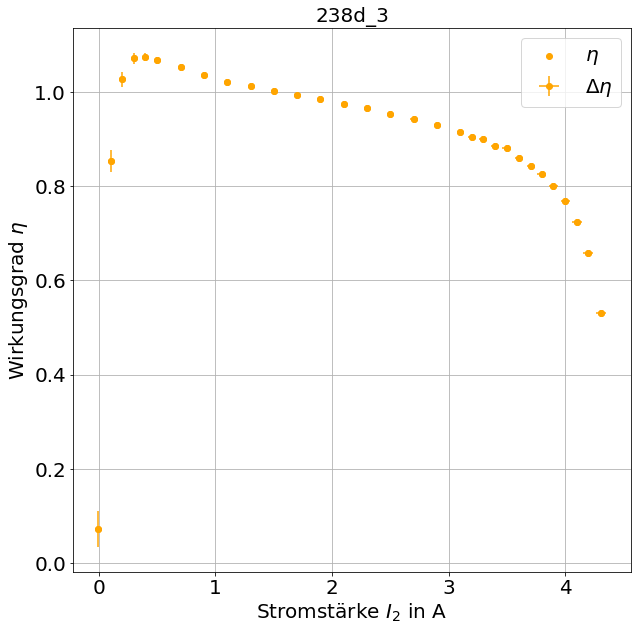

In [16]:
#Hier wird der Plot erstellt

name = "238d_3"

#Werte festlegen

#Orange
y_1 = eta
x_1 = I_2
y_1_err = eta_err
x_1_err = I_2_err

xlabel = r'Stromstärke $I_2$ in A'
ylabel = r'Wirkungsgrad $\eta$'

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (10,10)) #Größe des Bildes
plt.scatter(x_1,y_1, color = "orange", label="$\eta$") #eigentlicher Plot
plt.xlabel(xlabel) #Achsenbeschriftung x-Achse
plt.ylabel(ylabel) #Achsenbeschriftung y-Achse
plt.title(name) #Titel des Plots
plt.errorbar(x_1, y_1, xerr = x_1_err, yerr = y_1_err, fmt = "o", color = "orange", label="$\Delta \eta$") #Fehlerbalken, color orange = Orange

plt.grid() #Gitter
plt.legend() #Legende erstellen
#plt.tick_params(axis = "x", labelrotation = 30) #Rotiert die Achsenticks um 30°
plt.show #Plot anzeigen
plt.savefig(f'{name+".jpg"}', dpi = 300) #Plot als jpg-Datei abspeichern

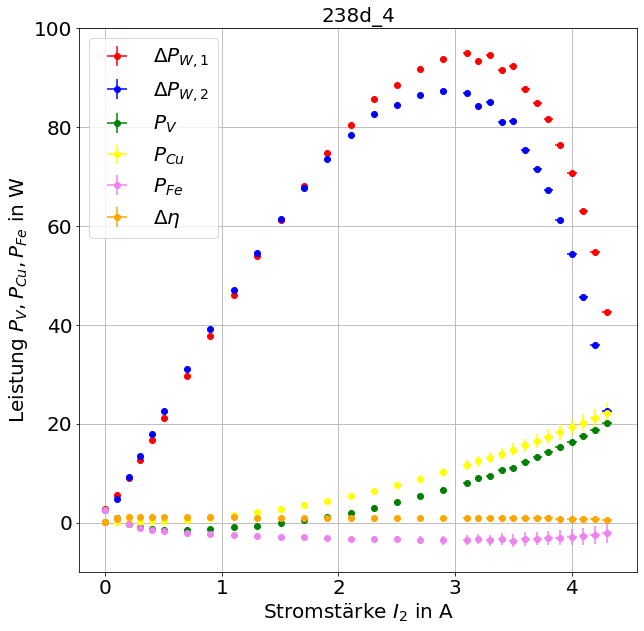

In [17]:
##### Alle in einem Plot:

#Hier wird der Plot erstellt

name = "238d_4"

#Werte festlegen

#Rot
x_1 = I_2
y_1 = P_W_1
x_1_err = I_2_err
y_1_err = P_W_1_err

#Blau
x_2 = I_2
y_2 = P_W_2
x_2_err = I_2_err
y_2_err = P_W_2_err

#Grün
x_3 = I_2
y_3 = P_V
x_3_err = I_2_err
y_3_err = P_V_err

#Gelb
x_4 = I_2
y_4 = P_Cu
x_4_err = I_2_err
y_4_err = P_Cu_err

#Violett
x_5 = I_2
y_5 = P_Fe
x_5_err = I_2_err
y_5_err = P_Fe_err

#Orange
y_6 = eta
x_6 = I_2
y_6_err = eta_err
x_6_err = I_2_err


xlabel = r'Stromstärke $I_2$ in A'
ylabel = r'Leistung $P_V, P_{Cu}, P_{Fe}$ in W'

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (10,10)) #Größe des Bildes

#plt.scatter(x_1,y_1, color = "r", label="$P_{W,1}$") #eigentlicher Plot
#plt.scatter(x_2,y_2, color = "b", label="$P_{W,2}$") #eigentlicher Plot
#plt.scatter(x_3,y_3, color = "g", label="$P_V$") #eigentlicher Plot
#plt.scatter(x_4,y_4, color = "yellow", label="$P_{Cu}$") #eigentlicher Plot
#plt.scatter(x_5,y_5, color = "violet", label="$P_{Fe}$") #eigentlicher Plot
#plt.scatter(x_6,y_6, color = "orange", label="$\eta$") #eigentlicher Plot

plt.xlabel(xlabel) #Achsenbeschriftung x-Achse
plt.ylabel(ylabel) #Achsenbeschriftung y-Achse
plt.title(name) #Titel des Plots

plt.errorbar(x_1, y_1, xerr = x_1_err, yerr = y_1_err, fmt = "o", color = "r", label="$\Delta P_{W,1}$") #Fehlerbalken, color r = Rot     #es geht auch marker="." statt fmt = "o"
plt.errorbar(x_2, y_2, xerr = x_2_err, yerr = y_2_err, fmt = "o", color = "b", label="$\Delta P_{W,2}$") #Fehlerbalken, color r = Rot     #es geht auch marker="." statt fmt = "o"
plt.errorbar(x_3, y_3, xerr = x_3_err, yerr = y_3_err, fmt = "o", color = "g", label="$P_V$") #Fehlerbalken, color r = Rot     #es geht auch marker="." statt fmt = "o"
plt.errorbar(x_4, y_4, xerr = x_4_err, yerr = y_4_err, fmt = "o", color = "yellow", label="$P_{Cu}$") #Fehlerbalken, color g = Grün
plt.errorbar(x_5, y_5, xerr = x_5_err, yerr = y_5_err, fmt = "o", color = "violet", label="$P_{Fe}$") #Fehlerbalken, color b = Blau
plt.errorbar(x_6, y_6, xerr = x_6_err, yerr = y_6_err, fmt = "o", color = "orange", label="$\Delta \eta$") #Fehlerbalken, color orange = Orange

plt.grid() #Gitter
plt.legend() #Legende erstellen
#plt.tick_params(axis = "x", labelrotation = 30) #Rotiert die Achsenticks um 30°
plt.show #Plot anzeigen
plt.savefig(f'{name+".jpg"}', dpi = 300) #Plot als jpg-Datei abspeichern

# 238.e

In [18]:
#238_e #omegaL aus Betrag der Eingangsimpedanz im Leerlauf bestimmen
print(f'{"238_e)":#^50}')

Drucken2 = True

#################### Werte berechnen ####################
if Drucken2 is True: print(f'{"Werte berechnen":#^50}')

#Leerlauf --> R = unendlich ; I_2 --> 0
#--> also der erste Wert der Tabelle

U_1_l = U_1[0] #erster Wert
I_1_l = I_1[0] #erster Wert
U_1_l_err = U_1_err[0] #erster Wert
I_1_l_err = I_1_err[0] #erster Wert

omegaL = U_1_l/I_1_l
if Drucken2 is True: print("omegaL", omegaL)

#################### Fehler berechnen ####################
if Drucken2 is True: print(f'{"Fehler berechnen":#^50}')

s1 = (1/I_1_l)*U_1_l_err
s2 = (U_1_l/I_1_l**2)*I_1_l_err
omegaL_err = (s1**2+s2**2)**(1/2)
if Drucken2 is True: print("Fehler auf omegaL", omegaL_err)

######################238_e)######################
#################Werte berechnen##################
omegaL 353.67069983160974
#################Fehler berechnen#################
Fehler auf omegaL 7.908317264734027


In [19]:
#################### LaTex-Tabelle erstellen ####################

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 3
columb1_rounded = [round_it(omegaL, k)]
columb2_rounded = [round_it(omegaL_err, k)]

table1 = tab.LatexTable([columb1_rounded, columb2_rounded])
print(table1)

print("\n")

print("$\omega L [V/A]$", "&", "$\Delta \omega L [V/A]$", "\\\ ")
#		\captionof{table}{Berechnete Werte $238.e$}

\begin{tabular}{cc}
\hline
354.0 & 7.91 \\ 
\end{tabular} 



$\omega L [V/A]$ & $\Delta \omega L [V/A]$ \\ 


# 238.f

In [20]:
#238_f #Streukoeffizient Sigma auf 4 verschiedene Arten berechnen
print(f'{"238_f)":#^50}')

Druckenf = True

print("\n")
#################### Kurzschlussfall  ####################
if Druckenf is True: print(f'{"Kurzschlussfall ":#^50}')

#R --> 0:
I_1_k = I_1[len(columb1)-1] #letzter Wert
print("Stromstärke I_1 im Kurzschlussfall:", I_1_k)
I_2_k = I_2[len(columb1)-1] #letzer Wert
print("Stromstärke I_2 im Kurzschlussfall:", I_2_k)
I_1_k_err = I_1_err[len(columb1)-1] #letzer Wert
print("Fehler auf I_1 im Kurzschlussfall:", I_1_k_err)
I_2_k_err = I_2_err[len(columb1)-1] #letzer Wert
print("Fehler auf I_2 im Kurzschlussfall:", I_2_k_err)

sigma1 = 2-2*(I_2_k/I_1_k)
if Druckenf is True: print("sigma im Kurzschlussfall:", sigma1)

s1 = (2/I_1_k)*I_2_k_err
s2 = (2*I_2_k/I_1_k**2)*I_1_k_err
sigma1_err = (s1**2+s2**2)**(1/2)
if Druckenf is True: print("Fehler auf sigma im Kurzschlussfall:", sigma1_err)

print("\n")
#################### Leerlauf  ####################
if Druckenf is True: print(f'{"Leerlauf ":#^50}')

#R = unendlich ; I_2 = 0
U_1_l = U_1[0] #erster Wert
print("Spannung U_1 im Leerlauf:", U_1_l)
U_2_l = U_2[0] #erster Wert
print("Spannung U_2 im Leerlauf:", U_2_l)
U_1_l_err = U_1_err[0] #erster Wert
print("Fehler auf U_1 im Leerlauf:", U_1_l_err)
U_2_l_err = U_2_err[0] #erster Wert
print("Fehler auf U_2 im Leerlauf:", U_2_l_err)

sigma2 = 2-2*(U_2_l/U_1_l)
if Druckenf is True: print("sigma im Leerlauf:", sigma2)

s1 = (2/U_1_l)*U_2_l_err
s2 = (2*U_2_l/U_1_l**2)*U_1_l_err
sigma2_err = (s1**2+s2**2)**(1/2)
if Druckenf is True: print("Fehler auf sigma im Leerlauf:", sigma2_err)

print("\n")
#################### Eingansimpedanzen Z ####################
if Druckenf is True: print(f'{"Eingansimpedanzen Z":#^50}')

#Z = U/I
    #U_1_l = U_1[0] #erster Wert
    #print("Spannung U_1 im Leerlauf:", U_1_l)
U_1_k = U_2[len(columb1)-1] #letzer Wert
print("Spannung U_1 im Kurzschlussfall:", U_1_k)
    #U_1_l_err = U_1_err[0] #erster Wert
    #print("Fehler auf U_1 im Leerlauf:", U_1_l_err)
U_1_k_err = U_2_err[len(columb1)-1] #letzer Wert
print("Fehler auf U_1 im Kurzschlussfall:", U_1_k_err)

I_1_l = I_1[0] #erster Wert
print("Stromstärke I_1 im Leerlauf:", I_1_l)
    #I_1_k = I_2[len(columb1)-1] #letzer Wert
    #print("Stromstärke I_1 im Kurzschlussfall:", I_1_k)
I_1_l_err = I_1_err[0] #erster Wert
print("Fehler auf I_1 im Leerlauf:", I_1_l_err)
    #I_1_k_err = I_2_err[len(columb1)-1] #letzer Wert
    #print("Fehler auf I_1 im Kurzschlussfall:", I_1_k_err)


sigma3 = (U_1_k*I_1_l)/(I_1_k*U_1_l)
if Druckenf is True: print("sigma aus den Eingansimpedanzen:", sigma3)

s1 = (I_1_l/(I_1_k*U_1_l))*U_1_k_err
s2 = (U_1_k/(I_1_k*U_1_l))*I_1_l_err
s3 = (-(U_1_k*I_1_l)/(I_1_k**2*U_1_l))*I_1_k_err
s4 = (-(U_1_k*I_1_l)/(I_1_k*U_1_l**2))*U_1_l_err
sigma3_err = (s1**2+s2**2)**(1/2)
if Druckenf is True: print("Fehler auf sigma aus den Eingangsimpedanzen:", sigma3_err)


print("\n")
#################### Kurzschlussstrom  ####################
if Druckenf is True: print(f'{"Kurzschlussstrom ":#^50}')

sigma4 = U_1_k/(I_2_k*omegaL)
if Druckenf is True: print("sigma aus dem Kurzschlussstrom:", sigma4)

s1 = (1/(I_2_k*omegaL))*U_1_k_err
s2 = (-U_1_k/(I_2_k**2*omegaL))*I_2_k_err
s3 = (-U_1_k/(I_2_k*omegaL**2))*omegaL_err
sigma4_err = (s1**2+s2**2)**(1/2)
if Druckenf is True: print("Fehler auf sigma aus dem Kurzschlussstrom:", sigma4_err)

######################238_f)######################


#################Kurzschlussfall #################
Stromstärke I_1 im Kurzschlussfall: 4.301761485
Stromstärke I_2 im Kurzschlussfall: 4.303691649
Fehler auf I_1 im Kurzschlussfall: 0.043017614850000004
Fehler auf I_2 im Kurzschlussfall: 0.04303691649
sigma im Kurzschlussfall: -0.0008973830867797794
Fehler auf sigma im Kurzschlussfall: 0.028296962160781584


####################Leerlauf #####################
Spannung U_1 im Leerlauf: 47.31546874
Spannung U_2 im Leerlauf: 46.04105572
Fehler auf U_1 im Leerlauf: 0.9463093748
Fehler auf U_2 im Leerlauf: 0.9208211144
sigma im Leerlauf: 0.05386876866856949
Fehler auf sigma im Leerlauf: 0.0550449036301352


###############Eingansimpedanzen Z################
Spannung U_1 im Kurzschlussfall: 5.262674738
Fehler auf U_1 im Kurzschlussfall: 0.10525349476000001
Stromstärke I_1 im Leerlauf: 0.1337839656
Fehler auf I_1 im Leerlauf: 0.001337839656
sigma aus den Eingansimpedanzen: 0.0034590840949276

In [21]:
#################### LaTex-Tabelle erstellen ####################

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 3
columb1 = ["$I_1 [A]$", "$I_2 [A]$", "$\Delta I_1 [A]$", "$\Delta I_2 [A]$", "$\sigma$", "$\Delta \sigma$"]
columb2_rounded = round_list([I_1_k, I_2_k, I_1_k_err, I_2_k_err, sigma1, sigma1_err], k)

columb3 =  ["$U_1 [V]$", "$U_2 [V]$", "$\Delta U_1 [V]$", "$\Delta U_2 [V]$", "$\sigma$", "$\Delta \sigma$"]
columb4_rounded = round_list([U_1_l, U_2_l, U_1_l_err, U_2_l_err, sigma2, sigma2_err], k)

columb5 = ["$U_{1,k} [V]$", "$\Delta U_{1,k} [V]$", "$I_{1,l} [A]$", "$\Delta I_{1,l} [A]$", "$\sigma$", "$\Delta \sigma$"]
columb6_rounded = round_list([U_1_k, U_1_k_err, I_1_l, I_1_l_err, sigma3, sigma3_err], k)

columb7 = ["$-$", "$-$", "$-$", "$-$", "$\sigma$", "$\Delta \sigma$"]
columb8_rounded = ["$-$", "$-$", "$-$", "$-$"]
columb8_rounded.append(round_it(sigma4, k))
columb8_rounded.append(round_it(sigma4_err, k))


#print(len(columb7))
#print(len(columb8_rounded))


table1 = tab.LatexTable([columb1, columb2_rounded, columb3, columb4_rounded, columb5, columb6_rounded, columb7, columb8_rounded])
print(table1)

print("\n")

print("Kurz-fall", "&", "Werte", "&", "Leerlauf", "&", "Werte", "&", "Impedanzen", "&", "Werte", "&", "Kurz-Strom", "&", "Werte", "\\\ ")
#		\captionof{table}{Berechnete Werte $238.f$}

\begin{tabular}{cccccccc}
\hline
$I_1 [A]$ & 4.3 & $U_1 [V]$ & 47.3 & $U_{1,k} [V]$ & 5.26 & $-$ & $-$ \\ 
$I_2 [A]$ & 4.3 & $U_2 [V]$ & 46.0 & $\Delta U_{1,k} [V]$ & 0.105 & $-$ & $-$ \\ 
$\Delta I_1 [A]$ & 0.043 & $\Delta U_1 [V]$ & 0.946 & $I_{1,l} [A]$ & 0.134 & $-$ & $-$ \\ 
$\Delta I_2 [A]$ & 0.043 & $\Delta U_2 [V]$ & 0.921 & $\Delta I_{1,l} [A]$ & 0.00134 & $-$ & $-$ \\ 
$\sigma$ & -0.000897 & $\sigma$ & 0.0539 & $\sigma$ & 0.00346 & $\sigma$ & 0.00346 \\ 
$\Delta \sigma$ & 0.0283 & $\Delta \sigma$ & 0.055 & $\Delta \sigma$ & 7.73e-05 & $\Delta \sigma$ & 7.73e-05 \\ 
\end{tabular} 



Kurz-fall & Werte & Leerlauf & Werte & Impedanzen & Werte & Kurz-Strom & Werte \\ 


# 238.g

In [22]:
#Varianzgewichteter Mittelwert von den 4 Werten für Sigma:

print("sigma1:", sigma1)
print("Fehler auf sigma1:", sigma1_err)
print("sigma2:", sigma2)
print("Fehler auf sigma2:", sigma2_err)
print("sigma3:", sigma3)
print("Fehler auf sigma3:", sigma3_err)
print("sigma4:", sigma4)
print("Fehler auf sigma4:", sigma4_err)
print(N)
N = 4
print(N)

sigma_ges = np.array([sigma1, sigma2, sigma3, sigma4])
print("sigma gesamt:", sigma_ges)
sigma_err_ges = np.array([sigma1_err,sigma2_err, sigma3_err, sigma4_err])
print("Fehler auf sigma gesamt:", sigma_err_ges)

sumsigmaerr =  sum(1/(sigma_err_ges)**2)
sigmagesdivsigmaerr = sum(sigma_ges/(sigma_err_ges)**2)

sigmaMittel = sigmagesdivsigmaerr/sumsigmaerr
print("Varianzgewichteter Mittelwert sigmaMittel:", sigmaMittel)


#Varianzgewichtete Standardabweichung von den 4 Werten für Sigma:

sigmaMittel_err = N/sumsigmaerr
print("Fehler auf den varianzgewichteten Mittelwert:", sigmaMittel_err)

# N wieder auf 31 setzten ( nur für den Fall der Fälle
N = 31
print(N)

sigma1: -0.0008973830867797794
Fehler auf sigma1: 0.028296962160781584
sigma2: 0.05386876866856949
Fehler auf sigma2: 0.0550449036301352
sigma3: 0.00345908409492761
Fehler auf sigma3: 7.734747176146471e-05
sigma4: 0.00345753272923101
Fehler auf sigma4: 7.731278216990913e-05
31
4
sigma gesamt: [-0.00089738  0.05386877  0.00345908  0.00345753]
Fehler auf sigma gesamt: [2.82969622e-02 5.50449036e-02 7.73474718e-05 7.73127822e-05]
Varianzgewichteter Mittelwert sigmaMittel: 0.0034583415448049613
Fehler auf den varianzgewichteten Mittelwert: 1.19598388065085e-08
31


In [23]:
#238_g
print(f'{"238_g)":#^50}')

Druckeng = True

######################################## Gemessenes Verhätnis ########################################
if Druckeng is True: print(f'{"Gemessenes Verhätnis":#^50}')

#################### Werte berechnen ####################
if Druckeng is True: print(f'{"Werte berechnen":#^50}')

Verh_gem = U_2/U_1
print("Verhälhnis U_2/U_1 gemessen:", Verh_gem)

#print("U_2:", U_2)
#print("U_1:", U_1)

#################### Fehler berechnen ####################
if Druckeng is True: print(f'{"Fehler berechnen":#^50}')

s1 = (1/U_1)*U_2_err
s2 = (-U_2/U_1**2)*U_1_err
Verh_gem_err = (s1**2+s2**2)**(1/2)
print("Fehler auf Verhälhnis gemessen:", Verh_gem_err)

######################################## berechnetes Verhätnis ########################################
if Druckeng is True: print(f'{"berechnetes Verhätnis":#^50}')

sigma = sigma2
print("sigma vom Leerlauf:", sigma)
sigma_err = sigma2_err
print("Fehler auf sigma vom Leerlauf:", sigma_err)

omegaL = omegaL
print("omegaL vom Leerlauf:", omegaL)
omegaL_err = omegaL_err
print("Fehler auf omegaL vom Leerlauf:", omegaL_err)

print("U_2 Leerlauf:", U_2_l)
print("Fehler auf U_2 Leerlauf:", U_2_l_err)
print("U_1 Leerlauf:", U_2_l)
print("Fehler auf U_1 Leerlauf:", U_2_l_err)

R_V = R_L
print("Widerstand der Spulen R_V in Ohm:", R_V)

#################### Werte berechnen ####################
if Druckeng is True: print(f'{"Werte berechnen":#^50}')

R = U_2/I_2 #in Aufgbenstellung 238.g
print("Widerstand R in Ohm", R)

"""
#im Leerlauf R --> unendlich
ML = U_2_l/U_1_l
print("M/L:", ML)
"""

#Impedanzen R --> unendlich
ML = U_2_l/U_1_l
print("M/L:", ML)

#aus Gl. 238.29
Verh_ber = (R/(R+R_L))*((ML)/(1+((sigma*omegaL)/(R+2*R_V))**2)**(1/2))
print("Verhälhnis berechnet:", Verh_ber)


#################### Fehler berechnen ####################
if Druckeng is True: print(f'{"Fehler berechnen":#^50}')

s1 = (1/I_2)*U_2_err
s2 = (-U_2/I_2**2)*I_2_err
R_err = (s1**2+s2**2)**(1/2)
print("Fehler auf R in Ohm:",R_err)

s1 = (1/U_1_l)*U_2_l
s2 = (U_2_l/U_1_l**2)*U_1_l
ML_err = (s1**2+s2**2)**(1/2)
print("Fehler auf M/L:", ML_err)

s1 = ((ML*(omegaL**2*sigma**2+2*R*R_V+4*R_V**2))/((R+2*R_V)**3*((omegaL**2*sigma**2)/(R+2*R_V)+1)**(3/2)))*R_err
s2 = (R/((R+2*R_V)*((omegaL**2*sigma**2+(R+2*R_V)**2)/(R+2*R_V)**2)**(1/2)))*ML_err
s3 = ((omegaL**2*ML*R*sigma)/((R+2*R_V)**3*((omegaL**2*sigma**2+(R+2*R_V)**2)/(R+2*R_V)**2)**(3/2)))*sigma_err
s4 = ((omegaL*ML*R*sigma**2)/((R+2*R_V)**3*((omegaL**2*sigma**2+(R+2*R_V)**2)/(R+2*R_V)**2)**(3/2)))*omegaL_err
Verh_ber_err = (s1**2+s2**2+s3**2+s4**2)**(1/2)
print("Fehler auf Verhälhnis berechnet:", Verh_gem_err)




######################238_g)######################
###############Gemessenes Verhätnis###############
#################Werte berechnen##################
Verhälhnis U_2/U_1 gemessen: [0.97306562 0.97009777 0.96675224 0.96285526 0.95872284 0.95348248
 0.94222293 0.92592754 0.9095858  0.89183275 0.87174169 0.84974728
 0.82612367 0.79836713 0.76912734 0.72461924 0.68713935 0.64602479
 0.60155373 0.55314414 0.49777288 0.56428614 0.51062667 0.44766398
 0.4125638  0.37828931 0.33577557 0.29017683 0.23813731 0.18295011
 0.11200147]
#################Fehler berechnen#################
Fehler auf Verhälhnis gemessen: [0.02752245 0.02743851 0.02734388 0.02723366 0.02711678 0.02696856
 0.02665009 0.02618919 0.02572697 0.02522484 0.02465658 0.02403448
 0.02336631 0.02258123 0.02175421 0.02049533 0.01943524 0.01827234
 0.01701451 0.01564528 0.01407914 0.01596042 0.0144427  0.01266185
 0.01166907 0.01069964 0.00949717 0.00820744 0.00673554 0.00517461
 0.00316788]
##############berechnetes Verhätnis####

In [24]:
#################### LaTex-Tabelle erstellen ####################

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 3
columb1_rounded = round_list(Verh_gem, k)
columb2_rounded = round_list(Verh_gem_err, k)
columb3_rounded = round_list(R, k)
columb4_rounded = round_list(R_err, k)

#Verh_ber = [1]*len(columb1_rounded)
#Verh_ber_err = [1]*len(columb1_rounded)
columb5_rounded = round_list(Verh_ber, k)
columb6_rounded = round_list(Verh_ber_err, k)

print(len(columb1_rounded))
print(len(columb2_rounded))

print(len(columb3_rounded))
print(len(columb4_rounded))

print(len(columb5_rounded))
print(len(columb6_rounded))



table1 = tab.LatexTable([columb1_rounded, columb2_rounded, columb3_rounded, columb4_rounded, columb5_rounded, columb6_rounded])
print(table1)

print("\n")

print("$U_2/U_1 gem$", "&", "$\Delta U_2/U_1 gem$", "&", "$R [\Omega]$", "&", "$\Delta R [\Omega]$", "&", "$U_2/U_1 ber$", "&", "$\Delta U_2/U_1 ber$", "\\\ ")

31
31
31
31
31
31
\begin{tabular}{cccccc}
\hline
0.973 & 0.0275 & -11100.0 & 247.0 & 0.973 & 1.38 \\ 
0.97 & 0.0274 & 439.0 & 9.83 & 0.971 & 1.37 \\ 
0.967 & 0.0273 & 226.0 & 5.04 & 0.967 & 1.36 \\ 
0.963 & 0.0272 & 152.0 & 3.4 & 0.962 & 1.36 \\ 
0.959 & 0.0271 & 114.0 & 2.54 & 0.955 & 1.34 \\ 
0.953 & 0.027 & 89.6 & 2.0 & 0.946 & 1.33 \\ 
0.942 & 0.0267 & 63.2 & 1.41 & 0.924 & 1.3 \\ 
0.926 & 0.0262 & 48.5 & 1.08 & 0.897 & 1.26 \\ 
0.91 & 0.0257 & 38.9 & 0.869 & 0.865 & 1.22 \\ 
0.892 & 0.0252 & 32.1 & 0.718 & 0.829 & 1.17 \\ 
0.872 & 0.0247 & 27.1 & 0.606 & 0.79 & 1.12 \\ 
0.85 & 0.024 & 23.3 & 0.522 & 0.749 & 1.07 \\ 
0.826 & 0.0234 & 20.3 & 0.455 & 0.708 & 1.02 \\ 
0.798 & 0.0226 & 17.7 & 0.397 & 0.664 & 0.967 \\ 
0.769 & 0.0218 & 15.6 & 0.349 & 0.62 & 0.913 \\ 
0.725 & 0.0205 & 13.5 & 0.303 & 0.57 & 0.849 \\ 
0.687 & 0.0194 & 11.9 & 0.265 & 0.524 & 0.788 \\ 
0.646 & 0.0183 & 10.4 & 0.232 & 0.478 & 0.725 \\ 
0.602 & 0.017 & 9.06 & 0.203 & 0.433 & 0.66 \\ 
0.553 & 0.0156 & 7.84 & 0.

Verh_gem: [0.97306562 0.97009777 0.96675224 0.96285526 0.95872284 0.95348248
 0.94222293 0.92592754 0.9095858  0.89183275 0.87174169 0.84974728
 0.82612367 0.79836713 0.76912734 0.72461924 0.68713935 0.64602479
 0.60155373 0.55314414 0.49777288 0.56428614 0.51062667 0.44766398
 0.4125638  0.37828931 0.33577557 0.29017683 0.23813731 0.18295011
 0.11200147]
Verh_ber: [0.97311697 0.97083219 0.96707522 0.96184122 0.95493534 0.94601036
 0.92437281 0.89740916 0.86544555 0.82930862 0.78980111 0.74927879
 0.70812933 0.66352305 0.61991909 0.57016329 0.52401243 0.47808561
 0.43274149 0.38732393 0.34009932 0.40247929 0.35531376 0.30470053
 0.27824031 0.25363098 0.22420848 0.19393923 0.16067509 0.12622813
 0.08235019]


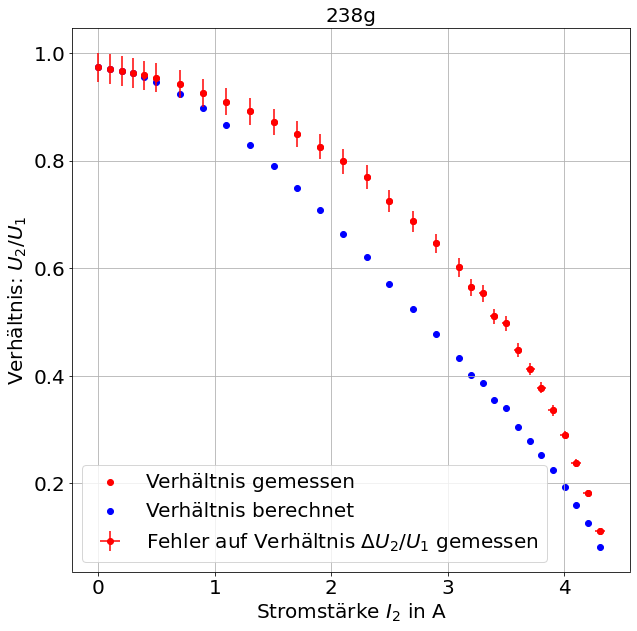

In [25]:
#Hier wird der Plot erstellt

name = "238g"

#Werte festlegen

#Rot
x_1 = I_2
y_1 = Verh_gem
x_1_err = I_2_err
y_1_err = Verh_gem_err

print("Verh_gem:", Verh_gem)

#Blau
x_2 = I_2
y_2 = Verh_ber
x_2_err = I_2_err
y_2_err = Verh_ber_err

print("Verh_ber:", Verh_ber)

xlabel = r'Stromstärke $I_2$ in A'
ylabel = r'Verhältnis: $U_2/U_1$'

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (10,10)) #Größe des Bildes

plt.scatter(x_1,y_1, color = "r", label="Verhältnis gemessen") #eigentlicher Plot
plt.scatter(x_2,y_2, color = "b", label="Verhältnis berechnet") #eigentlicher Plot

plt.xlabel(xlabel) #Achsenbeschriftung x-Achse
plt.ylabel(ylabel) #Achsenbeschriftung y-Achse
plt.title(name) #Titel des Plots

plt.errorbar(x_1, y_1, xerr = x_1_err, yerr = y_1_err, fmt = "o", color = "r", label=r'Fehler auf Verhältnis $\Delta U_2/U_1$ gemessen') #Fehlerbalken, color r = rot
#plt.errorbar(x_2, y_2, xerr = x_2_err, yerr = y_2_err, fmt = "o", color = "b", label=r'Fehler auf Verhältnis berechnet') #Fehlerbalken, color b = blau

plt.grid() #Gitter
plt.legend() #Legende erstellen
#plt.tick_params(axis = "x", labelrotation = 30) #Rotiert die Achsenticks um 30°
plt.show #Plot anzeigen
plt.savefig(f'{name+".jpg"}', dpi = 300) #Plot als jpg-Datei abspeichern